In [1]:
#引入pandas ,numpy，scipy
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#提取预订记录表数据
data1=pd.read_csv('reserve.csv')
data1

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600
3,r4,h_214,c_1,2017-03-08 03:20:10,2017-03-29,11:00:00,2017-03-30,4,194400
4,r5,h_16,c_1,2017-09-05 19:50:37,2017-09-22,10:30:00,2017-09-23,3,68100
...,...,...,...,...,...,...,...,...,...
4025,r4026,h_129,c_999,2017-06-27 23:00:02,2017-07-10,09:30:00,2017-07-11,2,16000
4026,r4027,h_97,c_999,2017-09-29 05:24:57,2017-10-09,10:30:00,2017-10-10,2,41800
4027,r4028,h_27,c_999,2018-03-14 05:01:45,2018-04-02,11:30:00,2018-04-04,2,74800
4028,r4029,h_48,c_1000,2016-04-16 15:20:17,2016-05-10,09:30:00,2016-05-13,4,540000


In [3]:
#提取酒店主表数据
data2=pd.read_csv('hotel.csv')
data2

,hotel_id,base_price,big_area_name,small_area_name,hotel_latitude,hotel_longitude,is_business
0,h_1,26100,D,D-2,43.064569,141.511397,True
1,h_2,26400,A,A-1,35.715320,139.939446,True
2,h_3,41300,E,E-4,35.281572,136.988565,False
3,h_4,5200,C,C-3,38.431293,140.795615,False
4,h_5,13500,G,G-3,33.597291,130.533872,True
...,...,...,...,...,...,...,...
295,h_296,17200,F,F-4,34.638426,132.564713,True
296,h_297,30000,A,A-3,35.815512,139.940259,False
297,h_298,9800,A,A-1,35.717254,139.738926,False
298,h_299,24200,C,C-2,38.335725,140.797714,False


In [4]:
#提取顾客主表数据
data3=pd.read_csv('customer.csv')
data3

,customer_id,age,sex,home_latitude,home_longitude
0,c_1,41,man,35.092193,136.512347
1,c_2,38,man,35.325076,139.410551
2,c_3,49,woman,35.120543,136.511179
3,c_4,43,man,43.034868,141.240314
4,c_5,31,man,35.102661,136.523797
...,...,...,...,...,...
995,c_996,44,man,34.465648,135.373787
996,c_997,35,man,35.345372,139.413754
997,c_998,32,woman,43.062267,141.272126
998,c_999,48,woman,38.172800,140.464198


In [5]:
#观察预订记录表数据
data1.describe()

,people_num,total_price
count,4030.000000,4030.000000
mean,2.542184,103065.955335
std,1.120925,110288.484355
min,1.000000,3500.000000
25%,2.000000,32400.000000
50%,3.000000,64800.000000
75%,4.000000,129600.000000
max,4.000000,897600.000000


In [6]:
#观察酒店主表数据
data2.describe()

,base_price,hotel_latitude,hotel_longitude
count,300.000000,300.000000,300.000000
mean,20197.666667,36.672407,138.437448
std,15270.012185,2.475990,3.450787
min,3500.000000,33.491110,130.529900
25%,9300.000000,35.285222,136.985115
50%,15600.000000,35.716535,139.800617
75%,25125.000000,38.328767,140.793411
max,74800.000000,43.165512,141.515930


In [7]:
#观察顾客主表数据
data3.describe()

,age,home_latitude,home_longitude
count,1000.00000,1000.000000,1000.000000
mean,51.27500,36.301492,137.101549
std,14.76548,3.024908,3.590634
min,21.00000,33.264641,130.290768
25%,39.00000,34.444472,135.373918
50%,49.00000,35.294221,139.390638
75%,63.00000,38.172066,140.450375
max,89.00000,43.063960,141.274039


In [8]:
#下面均以预定表为例
#提取列名
data1.columns

Index(['reserve_id', 'hotel_id', 'customer_id', 'reserve_datetime',
       'checkin_date', 'checkin_time', 'checkout_date', 'people_num',
       'total_price'],
      dtype='object')

In [9]:
#查看预订记录表数据缺失
data1.isnull().any(axis=1)#行
#无缺失值不用进行下一步操作

0       False
1       False
2       False
3       False
4       False
        ...  
4025    False
4026    False
4027    False
4028    False
4029    False
Length: 4030, dtype: bool

In [10]:
#查看酒店主表数据缺失
data2.isnull().any(axis=0)#列

hotel_id           False
base_price         False
big_area_name      False
small_area_name    False
hotel_latitude     False
hotel_longitude    False
is_business        False
dtype: bool

In [11]:
#查看顾客主表数据缺失
data3.isnull().any(axis=0)#列

customer_id       False
age               False
sex               False
home_latitude     False
home_longitude    False
dtype: bool

In [12]:
#异常值识别,True是正常值，False是异常值
#预订记录表数据，第八列
((abs(data1.iloc[:,7])-np.mean(data1.iloc[:,7]))/np.std(data1.iloc[:,7]))<=3

0       True
1       True
2       True
3       True
4       True
        ... 
4025    True
4026    True
4027    True
4028    True
4029    True
Name: people_num, Length: 4030, dtype: bool

In [13]:
#第九列
((abs(data1.iloc[:,8])-np.mean(data1.iloc[:,8]))/np.std(data1.iloc[:,8]))<=3

0        True
1        True
2        True
3        True
4        True
        ...  
4025     True
4026     True
4027     True
4028    False
4029     True
Name: total_price, Length: 4030, dtype: bool

In [14]:
#对于出现异常值的数据行进行删除
data1[(((abs(data1.iloc[:,7])-np.mean(data1.iloc[:,7]))/np.std(data1.iloc[:,7]))<=3)&(((abs(data1.iloc[:,8])-np.mean(data1.iloc[:,8]))/np.std(data1.iloc[:,8]))<=3)]

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600
3,r4,h_214,c_1,2017-03-08 03:20:10,2017-03-29,11:00:00,2017-03-30,4,194400
4,r5,h_16,c_1,2017-09-05 19:50:37,2017-09-22,10:30:00,2017-09-23,3,68100
...,...,...,...,...,...,...,...,...,...
4024,r4025,h_160,c_999,2017-03-11 11:56:05,2017-03-27,10:00:00,2017-03-30,1,37200
4025,r4026,h_129,c_999,2017-06-27 23:00:02,2017-07-10,09:30:00,2017-07-11,2,16000
4026,r4027,h_97,c_999,2017-09-29 05:24:57,2017-10-09,10:30:00,2017-10-10,2,41800
4027,r4028,h_27,c_999,2018-03-14 05:01:45,2018-04-02,11:30:00,2018-04-04,2,74800


In [15]:
#数据规整化
#极差标准化，正向指标
def linear(x):
    a=np.min(x)
    b=np.max(x)
    x=(x-a)/(b-a)
    return x
x1=data1['people_num']
x2=data1['total_price']
data1['people_num']=linear(x1)
data1['total_price']=linear(x2)
data1

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,1.000000,0.104798
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,0.333333,0.019125
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,0.333333,0.033665
3,r4,h_214,c_1,2017-03-08 03:20:10,2017-03-29,11:00:00,2017-03-30,1.000000,0.213511
4,r5,h_16,c_1,2017-09-05 19:50:37,2017-09-22,10:30:00,2017-09-23,0.666667,0.072251
...,...,...,...,...,...,...,...,...,...
4025,r4026,h_129,c_999,2017-06-27 23:00:02,2017-07-10,09:30:00,2017-07-11,0.333333,0.013981
4026,r4027,h_97,c_999,2017-09-29 05:24:57,2017-10-09,10:30:00,2017-10-10,0.333333,0.042836
4027,r4028,h_27,c_999,2018-03-14 05:01:45,2018-04-02,11:30:00,2018-04-04,0.333333,0.079745
4028,r4029,h_48,c_1000,2016-04-16 15:20:17,2016-05-10,09:30:00,2016-05-13,1.000000,0.600045


In [16]:
#降维及可视化
#PCA降维及可视化
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
#删除非数据的列
data1=data1.drop(['reserve_id', 'hotel_id', 'customer_id', 'reserve_datetime',
       'checkin_date', 'checkin_time', 'checkout_date'],axis=1)

In [18]:
#降维，二维数据
pca=PCA(n_components=2)
data1=data1.dropna()
new=pca.fit_transform(data1)
new

array([[ 0.47961543, -0.07841298],
       [-0.19238889, -0.06446779],
       [-0.19023683, -0.05008818],
       ...,
       [-0.18341649, -0.00451586],
       [ 0.5529176 ,  0.41137881],
       [-0.51816052,  0.01086328]])

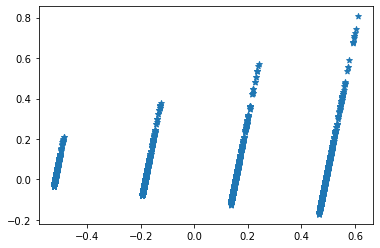

In [19]:
#可视化展示
plt.scatter(new[:,0],new[:,1],marker='*')
plt.show()

In [20]:
data3.columns

Index(['customer_id', 'age', 'sex', 'home_latitude', 'home_longitude'], dtype='object')

In [21]:
data3=data3.drop(['customer_id','sex'],axis=1)

In [22]:
pca=PCA(n_components=2)
data3=data3.dropna()
ne=pca.fit_transform(data3)
ne

array([[-10.25231004,  -1.40172336],
       [-13.3003127 ,   0.95949216],
       [ -2.25394394,  -1.23760688],
       ...,
       [-19.40259447,   7.10978652],
       [ -3.34595617,   3.73700953],
       [-12.30170857,   1.05753895]])

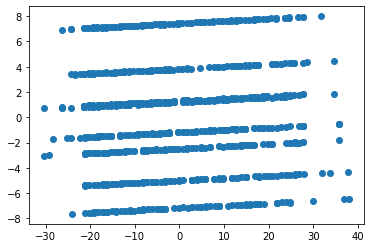

In [23]:
plt.scatter(ne[:,0],ne[:,1],marker='o')
plt.show()